In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

In [ ]:
data.head(98)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
93,1,TRANSFER,583848.46,C1839168128,0.0,0.00,C1286084959,667778.00,2107778.11,0,0
94,1,TRANSFER,1724887.05,C1495608502,0.0,0.00,C1590550415,3470595.10,19169204.93,0,0
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0,0


In [ ]:
dar=data.shape
print( dar)

(1048439, 11)


# ML MODELS
**1.SVC**

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
import pandas as pd

# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)
# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 100 times based on the support value

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers
classifiers = {

  """  "Random Forest": RandomForestClassifier(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),"""
    #"XGBoost": XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier(),

}

# Train, evaluate, and plot for each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Classification report
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))

# AUC ROC graph
"""    fig, ax = plt.subplots(figsize=(8, 6))
    roc_display = RocCurveDisplay.from_predictions(y_test, y_pred, name=name)
    roc_display.plot(ax=ax)
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()"""

[LightGBM] [Info] Number of positive: 188370, number of negative: 837918
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.139131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1379
[LightGBM] [Info] Number of data points in the train set: 1026288, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.183545 -> initscore=-1.492512
[LightGBM] [Info] Start training from score -1.492512
Model:   "Random Forest": RandomForestClassifier(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),LightGBM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209343
           1       0.99      1.00      1.00     47230

    accuracy                           1.00    256573
   macro avg       1.00      1.00      1.00    256573
weighted avg       1.00      1.00      1.00    256573



"    fig, ax = plt.subplots(figsize=(8, 6))\n    roc_display = RocCurveDisplay.from_predictions(y_test, y_pred, name=name)\n    roc_display.plot(ax=ax)\n    plt.title(f'ROC Curve - {name}')\n    plt.xlabel('False Positive Rate')\n    plt.ylabel('True Positive Rate')\n    plt.legend(loc='lower right')\n    plt.show()"

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Random Forest Classifier
random_forest_classifier = RandomForestClassifier()

# LightGBM Classifier
lgb_classifier = LGBMClassifier()

# XGBoost Classifier
xgb_classifier = XGBClassifier()

# SVM Classifier with Linear Kernel
svm_classifier = SVC(kernel='linear')


In [ ]:
print(X)

         step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     2    9839.64      170136.00       160296.36            0.00   
1           1     2    1864.28       21249.00        19384.72            0.00   
2           1     2   11668.14       41554.00        29885.86            0.00   
3           1     2    7817.71       53860.00        46042.29            0.00   
4           1     2    7107.77      183195.00       176087.23            0.00   
...       ...   ...        ...            ...             ...             ...   
1282856    97     1  268049.77       30563.12            0.00       286162.34   
1282857    97     2    3136.92       19990.00        16853.08            0.00   
1282858    97     2    6951.07      104432.00        97480.93            0.00   
1282859    97     2    6821.43       11252.00         4430.57            0.00   
1282860    97     2    9138.62       21564.00        12425.38            0.00   

         newbalanceDest  
0

In [ ]:
print(y)

0          0
1          0
2          0
3          0
4          0
          ..
1282856    1
1282857    1
1282858    1
1282859    1
1282860    1
Name: isFraud, Length: 1282861, dtype: int64


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1282861, 7) (1026288, 7) (256573, 7) (1026288,) (256573,)


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.datasets import load_iris



# Train a LightGBM classifier (or any other model)
model1 = LGBMClassifier()
model1.fit(X, y)

# Now 'model' contains the trained LightGBM classifier
# You can use 'model' for predictions or save it to a file



[LightGBM] [Info] Number of positive: 235600, number of negative: 1047261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1379
[LightGBM] [Info] Number of data points in the train set: 1282861, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.183652 -> initscore=-1.491798
[LightGBM] [Info] Start training from score -1.491798


LGBMClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate RandomForestClassifier
model_rf = RandomForestClassifier()

# Train the model
model_rf.fit(X, y)

RandomForestClassifier()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
model_knn = KNeighborsClassifier()

# Train the KNN model
model_knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

# Train the model
model_dt.fit(X, y)


DecisionTreeClassifier()

Fine tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid for Decision Tree
param_grid_dtree = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the Decision Tree model
dtree = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search_dtree = GridSearchCV(estimator=dtree,
                                 param_grid=param_grid_dtree,
                                 scoring='roc_auc',
                                 cv=3,
                                 verbose=1)

# Fit the grid search to the data
grid_search_dtree.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters for Decision Tree:", grid_search_dtree.best_params_)
print("Best ROC AUC score for Decision Tree:", grid_search_dtree.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}
Best ROC AUC score for Decision Tree: 0.998600269918894


# Fine Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
param_grid_rf = {
   'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the Random Forest model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid_rf,
                              scoring='roc_auc',
                              cv=3,
                              verbose=1)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best ROC AUC score for Random Forest:", grid_search_rf.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}
Best ROC AUC score for Random Forest: 0.9995299721450936


# Fine Tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Creating a KFold object
folds = 3

# Specify range of hyperparameters
param_dist_knn = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree']
}

# Specify model
knn_model = KNeighborsClassifier()

# Set up RandomizedSearchCV
model_cv_knn = RandomizedSearchCV(estimator=knn_model,
                                  param_distributions=param_dist_knn,
                                  scoring='roc_auc',
                                  cv=folds,
                                  verbose=1,
                                  n_iter=10,  # Adjust as needed
                                  n_jobs=-1,  # Utilize all CPU cores
                                  return_train_score=True)

# Fit the model
model_cv_knn.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters for KNN:", model_cv_knn.best_params_)
print("Best ROC AUC score for KNN:", model_cv_knn.best_score_)








Fitting 3 folds for each of 10 candidates, totalling 30 fits


# Fine Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Train and evaluate a default RandomForestClassifier
default_rf_clf = RandomForestClassifier()
default_rf_clf.fit(X_train, y_train)

# Predict probabilities for the test set
default_y_pred_prob = default_rf_clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score for the default model
default_roc_auc = roc_auc_score(y_test, default_y_pred_prob)
print("Default ROC AUC Score:", default_roc_auc)

# Parameter grid for Random Forest
param_grid_rf = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the Random Forest model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid_rf,
                              scoring='roc_auc',
                              cv=3,
                              verbose=1)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Output the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print("Best parameters for Random Forest:", best_params_rf)
print("Best ROC AUC score for Random Forest (CV):", best_score_rf)

# Train and evaluate the RandomForestClassifier with the best parameters
best_rf_clf = grid_search_rf.best_estimator_

# Predict probabilities for the test set using the best model
best_y_pred_prob = best_rf_clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score for the tuned model
tuned_roc_auc = roc_auc_score(y_test, best_y_pred_prob)
print("Tuned ROC AUC Score:", tuned_roc_auc)


Default ROC AUC Score: 1.0
Fitting 3 folds for each of 8 candidates, totalling 24 fits


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-3a3511966c8c>", line 34, in <cell line: 34>
    grid_search_rf.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1918, in __call__
    ret

TypeError: object of type 'NoneType' has no len()

# Load Light GBM

In [ ]:
import pickle

# Assuming 'model' is your trained model object
# Save the model to a pickle file
with open('model_dt.pkl', 'wb') as f:
    pickle.dump(model_dt, f)

# Fit

In [ ]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Classification report
    print(f"Model: {name}")

NameError: name 'classifiers' is not defined

In [ ]:
from sklearn.metrics import accuracy_score

X_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)


In [ ]:
# accuracy score on the test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
import pickle

# Assuming 'model' is your trained model object
# Save the model to a pickle file
with open('model1.pkl', 'wb') as f:
    pickle.dump(model1, f)


Load pickel model1

In [ ]:
import pickle

# Assuming 'model' is your trained model object
# Save the model to a pickle file
with open('model_rf.pkl', 'wb') as f:
    pickle.dump(model_rf, f)

In [ ]:
import pickle

# Assuming 'model' is your trained model object
# Save the model to a pickle file
with open('model_knn.pkl', 'wb') as f:
    pickle.dump(model_knn, f)

In [ ]:
import pickle

# Assuming 'model' is your trained model object
# Save the model to a pickle file
with open('model_dt.pkl', 'wb') as f:
    pickle.dump(model_dt, f)

In [ ]:
import pickle
import sklearn

print("Pickle version:", pickle.format_version)
print("scikit-learn version:", sklearn.__version__)


Pickle version: 4.0
scikit-learn version: 1.2.2


In [ ]:
import numpy as np
import pickle



# Input data for prediction
input_data = np.array([[ 2, 9839.64, 170136.00, 160296.36, 0, 0]])
# Load the model from the pickle file
with open('model1.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
# Make predictions using the loaded model
prediction = loaded_model.predict(input_data)

# Print prediction
if prediction[0] == 0:
    print('The Transaction is non-Fraudulent')
else:
    print('The Transaction is Fraudulent')


ValueError: Number of features of the model must match the input. Model n_features_ is 7 and input n_features is 6

In [ ]:
import numpy as np
import pickle
input_data = (97  ,1 , 268049.77    ,   30563.12     ,       0.00     ,  286162.34 ,  141644.5    )

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



# Load the model from the pickle file
with open('model_knn.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Now 'loaded_model' should contain the trained model object

# Make predictions using the loaded model
prediction = loaded_model.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):
  print('The Transaction is  non-Fraudulent')
else:
  print('The Transaction is Fraudulent')

[1]
The Transaction is Fraudulent


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pickle
input_data = (1 , 268049.77    ,   30563.12     ,       0.00     ,  286162.34 ,  141644.5    )

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



# Load the model from the pickle file
with open('model_rf.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Now 'loaded_model' should contain the trained model object

# Make predictions using the loaded model
prediction = loaded_model.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):
  print('The Transaction is  non-Fraudulent')
else:
  print('The Transaction is Fraudulent')

[1]
The Transaction is Fraudulent


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training and combined validation-test sets
X_train_combined, X_valid_test, y_train_combined, y_valid_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the combined validation-test set into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.5, random_state=42)

# Now X_train_combined, y_train_combined contain the training data
# X_valid, y_valid contain the validation data
# X_test, y_test contain the test data


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create random forest classifier
rf_clf = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate performance
test_score = grid_search.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Score:", test_score)





Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Train and evaluate a default RandomForestClassifier
default_rf_clf = RandomForestClassifier()
default_rf_clf.fit(X_train, y_train)

# Evaluate the performance on the test set
default_test_score = default_rf_clf.score(X_test, y_test)
print("Default Test Score:", default_test_score)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create random forest classifier
rf_clf = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best parameters and score from grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train and evaluate the RandomForestClassifier with the best parameters
best_rf_clf = grid_search.best_estimator_
tuned_test_score = best_rf_clf.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best CV Score:", best_score)
print("Tuned Test Score:", tuned_test_score)


KeyboardInterrupt: 

In [ ]:
import pickle
filename = 'trained_model.sav'
pickle.dump(classifiers, open(filename, 'wb'))


In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
# Step 1: Install the necessary packages
!pip install pyngrok

!pip install -r "/content-my_dataset-streamlit-app/requirements.txt"

In [ ]:
import os
from threading import Thread
from pyngrok import ngrok

In [ ]:
# Add your ngrok token here
ngrok.set_auth_token('your_ngrok_auth_token')

In [ ]:
def run_streamlit():
    # Change the port if 8501 is already in use or if you prefer another port
    os.system('streamlit run /content/my_dataset-prediction-streamlit-app/app.py --server.port 8501')

In [ ]:
# Start a thread to run the Streamlit app
thread = Thread(target=run_streamlit)
thread.start()

In [ ]:
# Open a tunnel to the streamlit port 8501
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)
print('Your Streamlit app is live at:', public_url)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9985890955010854


In [ ]:
import  pickle
filename = 'trained_model.sav'
pickle.dump(classifiers, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
!pip install streamlit

In [ ]:
import numpy as np
import pickle
input_data = (97  ,1 , 268049.77    ,   30563.12     ,       0.00     ,  286162.34 ,  141644.5    )

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



# Load the model from the pickle file
with open('model_knn.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Now 'loaded_model' should contain the trained model object

# Make predictions using the loaded model
prediction = loaded_model.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):
  print('The Transaction is  non-Fraudulent')
else:
  print('The Transaction is Fraudulent')

[1]
The Transaction is Fraudulent


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## MODEL 4 ->>RNN

# DL MODELS

Epoch 1/10
32072/32072 [==============================] - 251s 8ms/step - loss: 0.1273 - accuracy: 0.9551 - val_loss: 0.0857 - val_accuracy: 0.9714
Epoch 2/10
32072/32072 [==============================] - 261s 8ms/step - loss: 0.0715 - accuracy: 0.9748 - val_loss: 0.0592 - val_accuracy: 0.9786
Epoch 3/10
32072/32072 [==============================] - 257s 8ms/step - loss: 0.0492 - accuracy: 0.9810 - val_loss: 0.0353 - val_accuracy: 0.9863
Epoch 4/10
32072/32072 [==============================] - 241s 8ms/step - loss: 0.0381 - accuracy: 0.9847 - val_loss: 0.0311 - val_accuracy: 0.9880
Epoch 5/10
32072/32072 [==============================] - 240s 7ms/step - loss: 0.0318 - accuracy: 0.9872 - val_loss: 0.0288 - val_accuracy: 0.9886
Epoch 6/10
32072/32072 [==============================] - 240s 7ms/step - loss: 0.0271 - accuracy: 0.9891 - val_loss: 0.0245 - val_accuracy: 0.9903
Epoch 7/10
32072/32072 [==============================] - 249s 8ms/step - loss: 0.0237 - accuracy: 0.9906 - val_

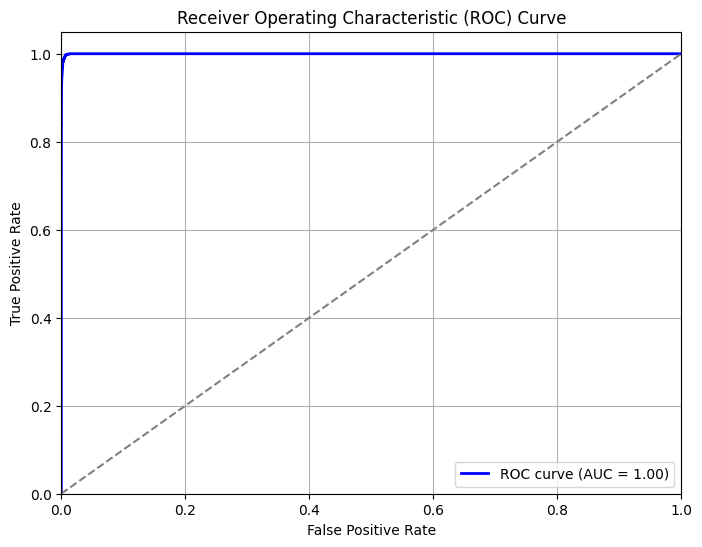

Simple neural network
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209343
           1       0.98      0.99      0.98     47230

    accuracy                           0.99    256573
   macro avg       0.99      0.99      0.99    256573
weighted avg       0.99      0.99      0.99    256573



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score  # Add this import statement

# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 4: Recurrent Neural Network (RNN)
model4 = keras.Sequential([
    layers.LSTM(64, input_shape=(X_train_scaled.shape[1], 1)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model4.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
y_pred = model4.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Make predictions
y_pred_prob = model4.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred)

print("Y_pre_prob")
print(y_pred_prob)
print("end")
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)
print("AUC ROC Score:", auc_roc)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test contains the true labels and y_pred_prob contains the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC-ROC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("Simple neural network")
print("Classification Report:")
print(classification_report_result)

In [ ]:
import tensorflow as tf

# Assuming you have trained and compiled a TensorFlow Keras model called 'model'
model4.save('my_model4.h5')  # Save the model to a HDF5 file
loaded_model = tf.keras.models.load_model('my_model4.h5')  # Load the saved model


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.ensemble import VotingClassifier

# Define ensemble classifiers
estimators = [
   # ('svm', svm_model),
    ('rf', model_rf),
    ('xgb', xgboost_model)
]

# Initialize the ensemble model
ensemble_model = VotingClassifier(estimators)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)


NameError: name 'model_rf' is not defined

In [ ]:
import tensorflow as tf

# Define your RNN model
model_rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, input_length=max_sequence_length),
    tf.keras.layers.SimpleRNN(units=64),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model_rnn.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


NameError: name 'vocabulary_size' is not defined

# # Model 5: Bidirectional Recurrent Neural Network (Bi-RNN)

Epoch 1/4
32072/32072 [==============================] - 355s 11ms/step - loss: 0.0878 - accuracy: 0.9685 - val_loss: 0.0536 - val_accuracy: 0.9806
Epoch 2/4
32072/32072 [==============================] - 284s 9ms/step - loss: 0.0482 - accuracy: 0.9816 - val_loss: 0.0414 - val_accuracy: 0.9850
Epoch 3/4
32072/32072 [==============================] - 285s 9ms/step - loss: 0.0372 - accuracy: 0.9853 - val_loss: 0.0309 - val_accuracy: 0.9880
Epoch 4/4
8018/8018 [==============================] - 26s 3ms/step
Confusion Matrix:
[[208357    986]
 [  1718  45512]]
8018/8018 [==============================] - 25s 3ms/step


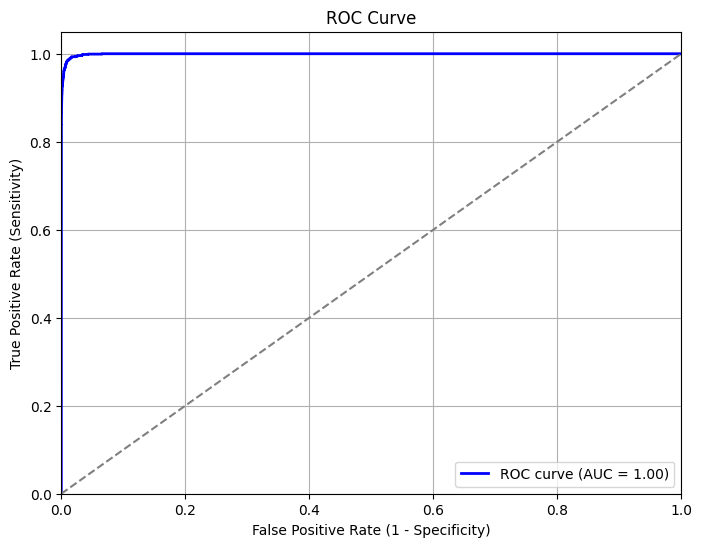

Y_pre_prob
[[9.8757392e-01]
 [9.6315764e-02]
 [9.3957924e-06]
 ...
 [5.0272404e-09]
 [7.9752833e-01]
 [1.3323556e-05]]
end
Simple neurl network
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    209343
           1       0.98      0.96      0.97     47230

    accuracy                           0.99    256573
   macro avg       0.99      0.98      0.98    256573
weighted avg       0.99      0.99      0.99    256573



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Model 5: Bidirectional Recurrent Neural Network (Bi-RNN)
model5 = keras.Sequential([
    layers.Bidirectional(layers.LSTM(64), input_shape=(X_train_scaled.shape[1], 1)),
    layers.Dense(1, activation='sigmoid')
])
# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model5.fit(X_train_scaled, y_train, epochs=4, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
y_pred = model5.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Make predictions
y_pred_prob = model5.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred)


# Calculate the probabilities of the positive class (fraud) from the model's predictions
y_pred_prob = model5.predict(X_test_scaled)

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("Y_pre_prob")
print(y_pred_prob)
print("end")
print("Simple neurl network")
print("Classification Report:")
print(classification_report_result)

In [ ]:
import tensorflow as tf

# Assuming you have trained and compiled a TensorFlow Keras model called 'model'
model5.save('my_model5.h5')  # Save the model to a HDF5 file
loaded_model = tf.keras.models.load_model('my_model5.h5')  # Load the saved model

NameError: name 'model5' is not defined

# # Model 2: Deep Dense Neural Network

Epoch 1/5
32072/32072 - 51s - loss: 0.0869 - accuracy: 0.9686 - 51s/epoch - 2ms/step
Epoch 2/5
32072/32072 - 51s - loss: 0.0619 - accuracy: 0.9766 - 51s/epoch - 2ms/step
Epoch 3/5
32072/32072 - 50s - loss: 0.0522 - accuracy: 0.9801 - 50s/epoch - 2ms/step
Epoch 4/5
32072/32072 - 53s - loss: 0.0456 - accuracy: 0.9825 - 53s/epoch - 2ms/step
Epoch 5/5
32072/32072 - 50s - loss: 0.0414 - accuracy: 0.9839 - 50s/epoch - 2ms/step
8018/8018 [==============================] - 12s 1ms/step
Confusion Matrix:
[[208478    865]
 [  3751  43479]]
8018/8018 [==============================] - 11s 1ms/step


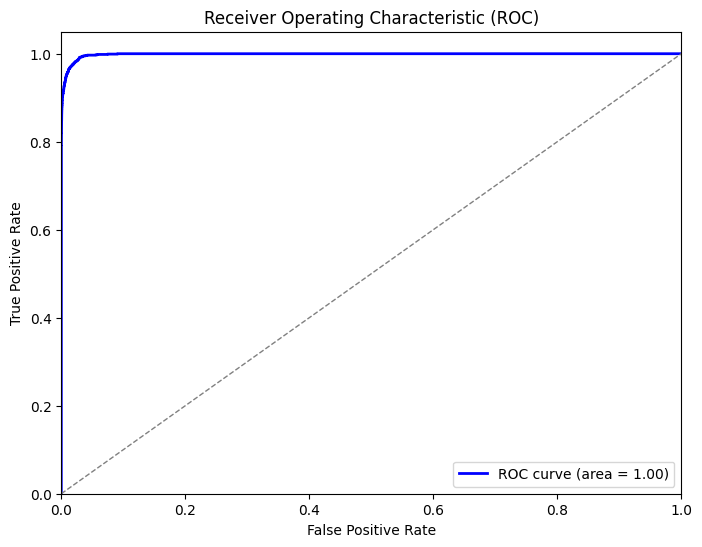

[[9.4531465e-01]
 [7.7361025e-02]
 [5.8813050e-04]
 ...
 [4.5406050e-05]
 [3.0014819e-01]
 [1.0768443e-05]]


'auc_roc = roc_auc_score(y_test, y_pred_prob)\nprint("AUC ROC Score:", auc_roc)\n\nprint("Deep Dense Neural Network")\nprint("Classification Report:")\nprint(classification_report_result)'

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have trained your model and stored predicted probabilities for the positive class
# Replace y_pred_prob with the predicted probabilities for the positive class from your model


# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 2: Deep Dense Neural Network
model2 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(X_train_scaled, y_train, epochs=5, batch_size=32, verbose=2)

# Evaluate the model
y_pred = model2.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Make predictions
y_pred_prob = model2.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(y_pred_prob)
# Calculate the AUC-ROC score
"""auc_roc = roc_auc_score(y_test, y_pred_prob)
print("AUC ROC Score:", auc_roc)

print("Deep Dense Neural Network")
print("Classification Report:")
print(classification_report_result)"""

In [ ]:
import tensorflow as tf

# Assuming you have trained and compiled a TensorFlow Keras model called 'model'
model2.save('my_model2.h5')  # Save the model to a HDF5 file
loaded_model = tf.keras.models.load_model('my_model2.h5')  # Load the saved model

# MODEL 8 # Model 8: Simple Deep Neural Network with Regularization (L2)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 8: Simple Deep Neural Network with Batch Normalizatio
# Model 8: Simple Deep Neural Network with Regularization (L2)
model8 = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])
# Compile the model
model8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model8.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_test_scaled, y_test))
# Evaluate the model
y_pred_prob = model8.predict(X_test_scaled)
y_pred_binary = np.round(y_pred_prob)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred_binary)


# Calculate the probabilities of the positive class (fraud) from the model's predictions
y_pred_prob = model8.predict(X_test_scaled).flatten()

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)

"""# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()"""

print("Y_pre_prob")
print(y_pred_prob)
print("end")
print("Simple neural network")
print("Classification Report:")
print(classification_report_result)

Epoch 1/5
32072/32072 [==============================] - 80s 2ms/step - loss: 0.2025 - accuracy: 0.9392 - val_loss: 0.1790 - val_accuracy: 0.9483
Epoch 2/5
32072/32072 [==============================] - 79s 2ms/step - loss: 0.1674 - accuracy: 0.9491 - val_loss: 0.1576 - val_accuracy: 0.9551
Epoch 3/5
32072/32072 [==============================] - 82s 3ms/step - loss: 0.1561 - accuracy: 0.9522 - val_loss: 0.1552 - val_accuracy: 0.9623
Epoch 4/5
32072/32072 [==============================] - 69s 2ms/step - loss: 0.1478 - accuracy: 0.9556 - val_loss: 0.1424 - val_accuracy: 0.9536
Epoch 5/5
8018/8018 [==============================] - 11s 1ms/step
Confusion Matrix:
[[206630   2713]
 [  6725  40505]]
8018/8018 [==============================] - 11s 1ms/step
Y_pre_prob
[0.67632085 0.253545   0.02847587 ... 0.00427266 0.28021434 0.04590629]
end
Simple neural network
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    209

In [ ]:
import tensorflow as tf

# Assuming you have trained and compiled a TensorFlow Keras model called 'model'
model8.save('my_model8.h5')  # Save the model to a HDF5 file
loaded_model = tf.keras.models.load_model('my_model8.h5')  # Load the saved model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#%pip install gradio
import gradio as gr
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
             value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Split data into features and target
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Train a simple feedforward neural network using Keras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dl_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Define prediction functions for ML and DL models
def predict_rf_model(features):
    prediction = rf_model.predict(features)
    return prediction

def predict_dl_model(features):
    scaled_features = scaler.transform(features)
    prediction = dl_model.predict_classes(scaled_features)
    return prediction.flatten()

# Define Gradio Interface
ml_model_interface = gr.Interface(
    fn=predict_rf_model,
    inputs="numpy",
    outputs="numpy",
    title="Random Forest Classifier",
    description="Predict whether a transaction is fraudulent using Random Forest Classifier."
)

dl_model_interface = gr.Interface(
    fn=predict_dl_model,
    inputs="numpy",
    outputs="numpy",
    title="Deep Learning Classifier",
    description="Predict whether a transaction is fraudulent using Deep Learning Classifier."
)

# Launch the interfaces
ml_model_interface.launch()
dl_model_interface.launch()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-22314065f07c>", line 31, in <cell line: 31>
    rf_model.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 473, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1918, in __call__
    return output if self.return_generator else list(output)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1847, in _get_sequential_output
    res = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 123, in __call__
    return self.function(*args, **kwargs)
  File

TypeError: object of type 'NoneType' has no len()

In [ ]:
!pip install streamlit -q

In [ ]:
%%writefile app.py

Overwriting app.py


In [ ]:
%%writefile app.py

Overwriting app.py


In [ ]:
%%writefile app1.py

Writing app1.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.231.214.8


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# Define the input data
input_data = ( 1, 268049.77, 30563.12, 0.00, 286162.34, 141644.5)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Load the model from the H5 file
loaded_model = load_model('my_model4.h5')

# Make predictions using the loaded model
prediction = loaded_model.predict(input_data_reshaped)

# Print the prediction
print(prediction)

# Determine if the transaction is fraudulent or not
if (prediction[0] == 0):
    print('The Transaction is non-Fraudulent')
else:
    print('The Transaction is Fraudulent')


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 7, 1), found shape=(None, 6)


deployment

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.231.214.8:8501

npx: installed 22 in 2.54s
your url is: https://tame-chicken-kneel.loca.lt
2024-06-12 10:25:08.766398: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 10:25:08.766466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 10:25:08.768253: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-12 10:25:08.779002: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# FOR DL MODEL DEPLOYMENT

In [ ]:
import streamlit as st
import numpy as np
import tensorflow as tf

def load_model(model_path):
    loaded_model = tf.keras.models.load_model(model_path)
    return loaded_model

def predict(model, input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    prediction = model.predict(input_data_reshaped)
    return prediction[0]

def main():
    st.title('Fraud Detection App')

    # Dropdown menu for selecting the model
    model_selection = st.selectbox('Select DL Model for Classification', ['DeepDens', 'RNN', 'BI_RNN', 'SimpleDense'])

    # Initialize model_path variable with a default value
    model_path = '/content/my_model2.h5'



    # Check if model_path is not empty before attempting to load the model
    if model_path:
        model = load_model(model_path)
        # Rest of the code
    else:


    # Load the selected model
      if model_selection == 'deepdense':
          model_path = '/content/my_model2.h5'
      elif model_selection == 'rnn':
          model_path = '/content/my_model4.h5'
      elif model_selection == 'bi-rnn':
          model_path = '/content/my_model5.h5'
      elif model_selection == 'simpledense':
          model_path = '/content/my_model8.h5'

    model = load_model(model_path)

    # Input fields
    st.subheader('Enter Transaction Details')
    input_data = []
    input_data.append(st.number_input('Feature 1', value=0))
    input_data.append(st.number_input('Feature 2', value=0))
    input_data.append(st.number_input('Feature 3', value=0.0))
    input_data.append(st.number_input('Feature 4', value=0.0))
    input_data.append(st.number_input('Feature 5', value=0.0))
    input_data.append(st.number_input('Feature 6', value=0.0))
    input_data.append(st.number_input('Feature 7', value=0.0))

    # Prediction
    if st.button('Predict'):
        prediction = predict(model, input_data)
        if prediction == 0:
            st.write('The Transaction is non-Fraudulent')
        else:
            st.write('The Transaction is Fraudulent')

if __name__ == "__main__":
    main()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-ac4d96bb2e10>", line 3, in <cell line: 3>
    import tensorflow as tf
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/__init__.py", line 48, in <module>
    from tensorflow._api.v2 import __internal__
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/__internal__/__init__.py", line 8, in <module>
    from tensorflow._api.v2.__internal__ import autograph
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/__internal__/autograph/__init__.py", line 9, in <module>
    from tensorflow.python.autograph.impl.api import tf_convert # line: 493
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 32, in <module>
    from tensorflow.python.autograph.converters import control_flow
  File "/usr/loca

TypeError: object of type 'NoneType' has no len()

# FOR ML MODEL DEPLOYMENT

In [ ]:
import streamlit as st
import numpy as np
import pickle

def load_model_ml(model_path):
    with open(model_path, 'rb') as f:
        loaded_model = pickle.load(f)
    return loaded_model
def load_model_dl(model_path):
    loaded_model = tf.keras.models.load_model_dl(model_path)
    return loaded_model

def predict(model, input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    prediction = model.predict(input_data_reshaped)
    return prediction[0]

def predict(model, input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    prediction = model.predict(input_data_reshaped)
    return prediction[0]


def main():
    st.title('Fraud Detection App')

    # Dropdown menu for selecting the model
    model_selection = st.selectbox('Select Ml Model for Classification', ['Light GBM', 'KNN', 'Decision Tree', 'Random Forest'])
     # Dropdown menu for selecting the model
    model_selection = st.selectbox('Select DL Model for Classification', ['DeepDens', 'RNN', 'BI_RNN', 'SimpleDense'])

    # Initialize model_path variable with a default value
    model_path = '/content/my_model2.h5'
    if model_path:
        model = load_model(model_path)
        # Rest of the code
    else:


    # Load the selected model
      if model_selection == 'deepdense':
          model_path = '/content/my_model2.h5'
      elif model_selection == 'rnn':
          model_path = '/content/my_model4.h5'
      elif model_selection == 'bi-rnn':
          model_path = '/content/my_model5.h5'
      elif model_selection == 'simpledense':
          model_path = '/content/my_model8.h5'

    model = load_model_dl(model_path)

    # Load the selected model
    if model_selection == 'Light GBM':
        model_path = 'model1.pkl'
    elif model_selection == 'KNN':
        model_path = 'model_knn.pkl'
    elif model_selection == 'Decision Tree':
        model_path = 'model_dt.pkl'
    elif model_selection == 'Random Forest':
        model_path = 'model_rf.pkl'

    model = load_model_dl(model_path)

    # Input fields
    st.subheader('Enter Transaction Details')
    input_data = []
    input_data.append(st.number_input('Feature 1', value=0))
    input_data.append(st.number_input('Feature 2', value=0))
    input_data.append(st.number_input('Feature 3', value=0.0))
    input_data.append(st.number_input('Feature 4', value=0.0))
    input_data.append(st.number_input('Feature 5', value=0.0))
    input_data.append(st.number_input('Feature 6', value=0.0))
    input_data.append(st.number_input('Feature 7', value=0.0))

    # Prediction
    if st.button('Predict'):
        prediction = predict(model, input_data)
        if prediction == 0:
            st.write('The Transaction is non-Fraudulent')
        else:
            st.write('The Transaction is Fraudulent')

if __name__ == "__main__":
    main()



NameError: name 'tf' is not defined

# MERGE CODE

In [ ]:
import streamlit as st
import numpy as np
import pickle
import tensorflow as tf

def load_model_ml(model_path):
    with open(model_path, 'rb') as f:
        loaded_model = pickle.load(f)
    return loaded_model

def load_model_dl(model_path):
    loaded_model = tf.keras.models.load_model(model_path)
    return loaded_model

def predict(model, input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    prediction = model.predict(input_data_reshaped)
    return prediction[0]

def main():
    st.title('Fraud Detection App')

    # Dropdown menu for selecting the model type
    model_type = st.selectbox('Select Model Type', ['ML Model', 'DL Model'])

    model = None
    model_path = None

    if model_type == 'ML Model':
        # Dropdown menu for selecting the ML model
        model_selection = st.selectbox('Select ML Model for Classification', ['Light GBM', 'KNN', 'Decision Tree', 'Random Forest'])

        # Load the selected ML model
        if model_selection == 'Light GBM':
            model_path = 'model1.pkl'
        elif model_selection == 'KNN':
            model_path = 'model1.pkl'
        elif model_selection == 'Decision Tree':
            model_path = 'model1.pkl'
        elif model_selection == 'Random Forest':
            model_path = 'model_rf.pkl'

        model = load_model_ml(model_path)

    elif model_type == 'DL Model':
        # Dropdown menu for selecting the DL model
        model_selection = st.selectbox('Select DL Model for Classification', ['DeepDense', 'RNN', 'BI_RNN', 'SimpleDense'])

        # Load the selected DL model
        if model_selection == 'DeepDense':
            model_path = '/content/my_model4.h5'
        elif model_selection == 'RNN':
            model_path = '/content/my_model4.h5'
        elif model_selection == 'BI_RNN':
            model_path = '/content/my_model4.h5'
        elif model_selection == 'SimpleDense':
            model_path = '/content/my_model4.h5'

        model = load_model_dl(model_path)

    if model is None:
        return

    # Input fields
    st.subheader('Enter Transaction Details')
    input_data = []

    input_data.append(st.number_input('Type', value=0))
    input_data.append(st.number_input('Amount', value=0.0))
    input_data.append(st.number_input('NameOrig', value=0.0))
    input_data.append(st.number_input('OldbalanceOrig', value=0.0))
    input_data.append(st.number_input('NewbalanceOrig', value=0.0))
    input_data.append(st.number_input('Oldbalncedest', value=0.0))

    # Prediction
    if st.button('Predict'):
        prediction = predict(model, input_data)
        if prediction == 0:
            st.write('The Transaction is non-Fraudulent')
        else:
            st.write('The Transaction is Fraudulent')

if __name__ == "__main__":
    main()


2024-06-12 10:08:54.339 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-06-12 10:08:54.342 Session state does not function when running a script without `streamlit run`
